In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("sample.csv", header=None)
np.random.seed(42)

In [5]:
data.head()

0         1  2
0  0.78051 -0.063669  0
1  0.28774  0.291390  0
2  0.40714  0.178780  0
3  0.29230  0.421700  0
4  0.50922  0.352560  0

In [6]:
data.shape

(100, 3)

In [7]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [8]:
def perceptronStep(X, y, W, b, learn_rate):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += b*learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= b*learn_rate
            
    return W, b


In [9]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k', label='Rejected')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k', label='Accepted')
    plt.xlabel('Test')
    plt.ylabel('Grades')
    
def display(m, b, epoch):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, label="epoch " + str(epoch))

In [10]:
def trainPerceptronAlgorithm(X, y, learn_rate, num_epochs):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max


    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        if i == 0:   
            display(W[1]/W[0] - b/W[0], b, i)
            
        if i == num_epochs-1:
            display(W[1]/W[0] - b/W[0], b, i)
           


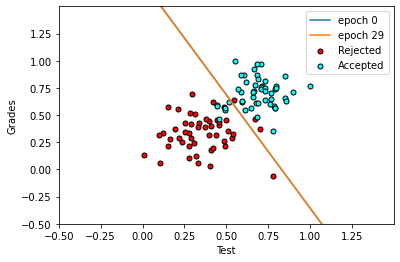

In [11]:
X = np.array(data[[0,1]])
y = np.array(data[2])

plot_points(X,y)
trainPerceptronAlgorithm(X, y, 0.000002, 30)
plt.xticks(np.arange(-0.5,1.5, 0.25))
plt.yticks(np.arange(-0.5,1.5, 0.25))
plt.legend()
plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.show()
